In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## 0. Wstęp teoretyczny

Funkcja kosztu dla pojedynczego przypadku będzie określona jako: 
$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \ln(a^{(i)}) - (1-y^{(i)} )  \ln(1-a^{(i)})$$

Natomiast całkowity koszt, to będzie średnia arytmetyczna pojedynczych kosztów:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Aby zminimalizować funkcję kosztu, będziemy korzystali z metody spadku gradientu, potrzebne do tego nam będą pochodne kierunkowe. Skorzystamy z ```propagacji wstecz```.

Wiedząc, że dla pojedynczego przypadku:

$$z = \theta^Tx^{(i)} + b$$
$$a = \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$$
$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \ln(a^{(i)}) - (1-y^{(i)} )  \ln(1-a^{(i)})$$

Możemy obliczyć pochodne:
$$ \frac{\partial z}{\partial \theta} = x \tag{1}$$
$$ \frac{\partial z}{\partial b} = 1 \tag{2}$$
$$ \frac{\partial a}{\partial z} = \frac{e^{-z}}{(1 + e^{-z})^2}\tag{3} $$
$$ \frac{\partial \mathcal{L}}{\partial a} = \frac{y}{a} + \frac{1-y}{1-a} = \frac{a-y}{a(1-a)}\tag{4} $$

Przekształcając:
$$a = \frac{1}{1 + e^{-z}} \implies e^{-z} = \frac{1 - a}{a} $$
Zatem pochodna $(3)$ będzie dana wzorem:
$$ \frac{\partial a}{\partial z} = a(1-a)$$ 

Dzięki tym obliczeniom uzyskamy pochodne kierunkowe $\frac{\partial \mathcal{L}}{\partial \theta}$ oraz $\frac{\partial \mathcal{L}}{\partial b}$, które obliczymy za pomocą propagacji wstecz:
$$\frac{\partial \mathcal{L}}{\partial \theta} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial \theta} = x(a-y) $$
$$\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b} = a - y $$

Zatem, dla wszystkich przypadków otrzymamy:
$$\frac{\partial J}{\partial \theta} = \frac{1}{m}X(A - Y)^T $$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (a_i - y_i) $$

Zatem w przypadku dodania do macierzy ```X``` wiersza jedynek, otrzymamy ogólny wzór:
$$\frac{\partial J}{\partial \theta} = \frac{1}{m}X(A - Y)^T $$

## Zadanie 1


Funkcja sigmoidalna
$$y = \frac{1}{1 + e^{-x}}$$

Funkcja odwrotna do sigmoidalnej

$$x = \ln{(\frac{y}{1-y})}$$

In [2]:
def sigmoid_reverse(y):
  return np.log(y/(1-y))

In [3]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [4]:
def h_fun(X, theta):
  z = theta.T @ X
  return sigmoid(z)

In [5]:
def calculate_cost(X, y, theta):
  h = h_fun(X, theta)
  y_1 = -y*np.log(h)
  y_0 = -(1-y)*np.log(1-h)
  return (y_1 + y_0).sum() / X.shape[1]

In [6]:
def logistic_regression(X, y, eps = 1e-7, alpha = 1e-3, print_cost = False):
  n, m = X.shape
  theta = np.zeros((n, 1))
  cost = calculate_cost(X, y, theta)
  i = 0
  while True:
    y_pred = h_fun(X, theta)
    assert y_pred.shape == y.shape
    h_y_diff = y_pred - y
    gradient = X  @ h_y_diff.T # (n,m) @ (m,1) = (n,1)
    theta = theta - alpha * gradient / m
    cost_prev, cost = cost, calculate_cost(X, y, theta)
    if print_cost and i % 1000 == 0:
      print(f'{i / 1000 + 1:.0f}. cost={cost}, cost_dif={np.abs(cost_prev - cost)}')
    i += 1
    if np.abs(cost_prev - cost) < eps:
      break

  return theta

In [7]:
X1 = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y1 = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

In [8]:
theta = logistic_regression(X1, y1, 1e-7, 1e-3)

Przygotowanie danych do wizualizacji

In [9]:
print(theta)

[[-9.87768605]
 [ 3.86694671]]


In [10]:
x_pred1 = np.linspace(-6, 6, 1000).reshape(1, -1)
x_pred1 = np.vstack([np.ones(x_pred1.shape), x_pred1])
y_pred1 = h_fun(x_pred1, theta)

true_indices = np.where(y1 == 1)[1]
false_indices = np.where(y1 == 0)[1]

Określenie granicy klasyfikacji

In [11]:
def get_index(Y, value):
  return np.where(Y >= value)[1][0]

In [12]:
index = get_index(y_pred1, 0.5)
x_pred1 = x_pred1[1, :].flatten()

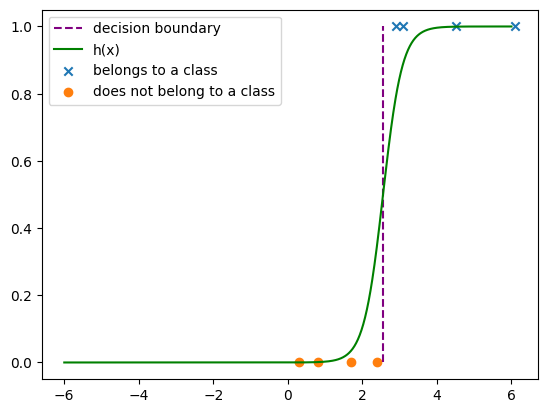

In [13]:
plt.plot([x_pred1[index], x_pred1[index]], [0, 1], label='decision boundary', color="purple", linestyle="--")
true_examplesX = X1[1, true_indices]
false_examplesX = X1[1, false_indices]
plt.plot(x_pred1, y_pred1.flatten(), label='h(x)', color='green') 
plt.scatter(true_examplesX, np.ones(true_examplesX.shape), marker='x',label='belongs to a class')
plt.scatter(false_examplesX, np.zeros(false_examplesX.shape), label='does not belong to a class')
plt.legend()
plt.show()

## Zadanie 2

In [14]:
with open("./admission.txt") as f:
  csv_reader = csv.reader(f)
  examples = []
  for row in csv_reader:
      examples.append([float(cell) for cell in row])
  data = np.array(examples)
  y2 = data[:, 2:3].T
  x = data[:, :2].T
  X2 = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X2.shape=}')
print(f'{y2.shape=}')

X2.shape=(3, 100)
y2.shape=(1, 100)


In [15]:
true_indices2 = np.where(y2 == 1)[1]
false_indices2 = np.where(y2 == 0)[1]

In [16]:
x_class_1 = X2[:, true_indices2]
x_class_0 = X2[:, false_indices2]

In [17]:
def plot_data(X, y):
  fig, ax = plt.subplots()
  true_indices = np.where(y == 1)[1]
  false_indices = np.where(y == 0)[1]
  x_class_1 = X[:, true_indices]
  x_class_0 = X[:, false_indices]
  ax.scatter(x_class_1[1, :], x_class_1[2, :], label='belongs to a class')
  ax.scatter(x_class_0[1, :], x_class_0[2, :], label='does not belong to a class')
  ax.legend()
  return fig

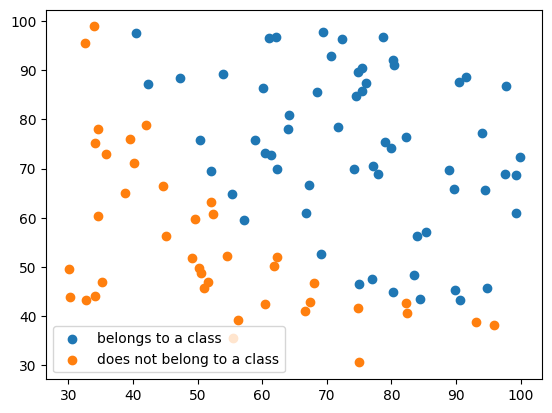

In [18]:
fig = plot_data(X2, y2)
plt.show()

In [19]:
theta2 = logistic_regression(X2, y2, 1e-6, 1e-3)

In [20]:
print(theta2)

[[-5.13364014]
 [ 0.04771429]
 [ 0.04072397]]


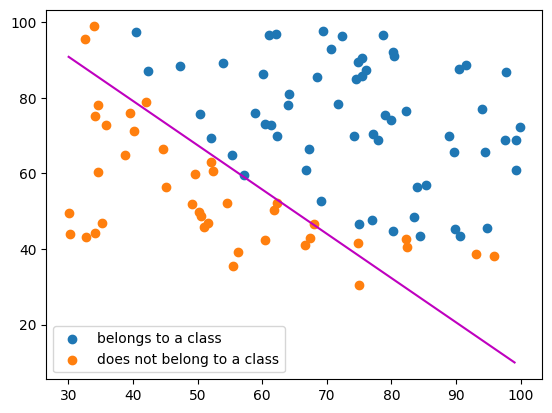

In [21]:
#dane
fig = plot_data(X2, y2)
x1_db = np.arange(X2[1, :].min(), X2[1, :].max(), 1)
x2_db = -theta2[0, 0]/theta2[2, 0] - theta2[1, 0]/theta2[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')
plt.show()


## Zadanie 3

Import danych

In [22]:
with open("./admission.txt") as f:
  csv_reader = csv.reader(f)
  examples = []
  for row in csv_reader:
      examples.append([float(cell) for cell in row])
  data = np.array(examples)
  y3 = data[:, 2:3].T
  x1 = data[:, :1].T
  x2 = data[:, 1:2].T
  X3 = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

In [23]:
print(f'{X3.shape=}')
print(f'{y3.shape=}')

X3.shape=(4, 100)
y3.shape=(1, 100)


In [24]:
X3_max = X3.max(axis=1)
X3_max.shape = [X3_max.shape[0], 1]
X3_min = X3.min(axis=1)
X3_min[0] = 0
X3_min.shape = [X3_min.shape[0], 1]
X3_scaled = (X3 - X3_min) / (X3_max - X3_min)

In [25]:
theta3 = logistic_regression(X3_scaled, y3, 1e-7, 1e-4)
print(theta3)

[[-2.78413631]
 [ 2.14332416]
 [ 2.91832306]
 [ 2.04671856]]


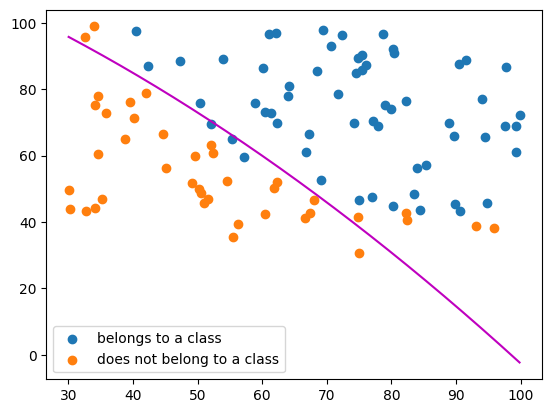

In [26]:
fig = plot_data(X2, y2)
x1 = np.linspace(X3[1, :].min(), X3[1, :].max(), 1000)
x1_squared = x1**2
x1_scaled = (x1 - X3_min[1, 0]) / (X3_max[1, 0] - X3_min[1, 0])
x1_squared_scaled = (x1_squared - X3_min[3, 0]) / (X3_max[3, 0] - X3_min[3, 0])

x2_scaled = -(theta3[0, 0] + theta3[1, 0]*x1_scaled + theta3[3, 0]*x1_squared_scaled) / theta3[2, 0]
x2 = x2_scaled * (X3_max[2, 0] - X3_min[2, 0]) + X3_min[2, 0]

plt.plot(x1, x2, '-m')
plt.show()


## Zadanie 4

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_digits()
y4 = data['target']
x4 = data['data']

In [28]:
print(f'{x4.shape=}')
print(f'{y4.shape=}')

x4.shape=(1797, 64)
y4.shape=(1797,)


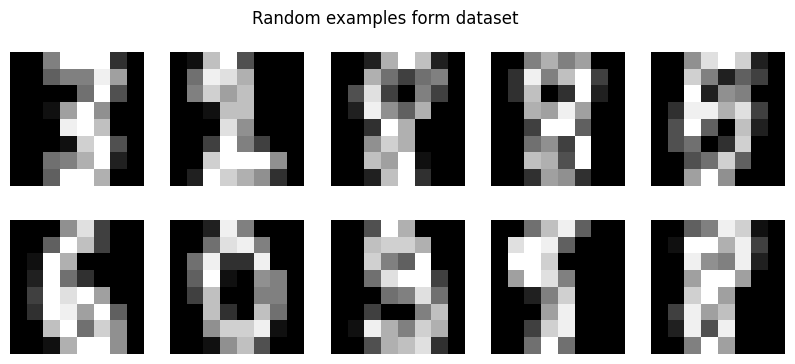

In [29]:
random_indices = np.random.choice(np.arange(0, x4.shape[0]), size=10, replace=False)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
plt.suptitle('Random examples form dataset')
for i, ax in enumerate(axs.flat):
    ex = x4[random_indices[i], :]
    ex = ex.reshape(8, 8)
    ax.imshow(ex, cmap='gray')
    ax.axis('off')
plt.show()

In [30]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, random_state=1234)
print(x4)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [31]:
thetas = []  # kontener na wagi kolejnych modeli
eps = 1e-5
no_of_cls = 10
alpha = 1e-1
max_brightness = 16

[m, n] = x4_train.shape

x4_scaled = x4_train.T / max_brightness
x4_scaled = np.vstack([np.ones([1, m]), x4_scaled])
print(f'{x4_train.shape=}')
print(f'{y4_train.shape=}')
for cls_id in range(no_of_cls):
  # print(f'Optymalizacja dla klasy {cls_id}')
  y_cls = (y4_train == cls_id).astype(np.int8)
  y_cls.shape = [1, m]
  thetai = logistic_regression(x4_scaled, y_cls, eps, alpha)
  thetas.append(thetai)

x4_train.shape=(1347, 64)
y4_train.shape=(1347,)


In [32]:
def predict(x, thetas):
  # x ma rozmiar (n, m) 
  [n, m] = x.shape
  y_preds = np.array([])
  x_scaled = x / max_brightness
  x_scaled = np.vstack([np.ones([1, m]), x_scaled]) # dodanie jedynek 
  for theta in thetas:
    y_pred = h_fun(x_scaled, theta)
    y_preds = np.vstack([y_preds, y_pred]) if y_preds.size else y_pred
  return np.argmax(y_preds, axis=0)


In [33]:
y_pred = predict(x4_test.T, thetas)

In [34]:
def confusion_matrix(y_true, y_pred):
  n = len(np.unique(y_true))
  cm = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      cm[i, j] = np.sum((y_true == i) & (y_pred == j))
  return cm

In [35]:
cm = confusion_matrix(y4_test, y_pred)
print(cm)

[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 44.  0.  0.  0.  0.  1.  0.  0.  2.]
 [ 0.  1. 47.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0. 43.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. 48.  0.  0.  2.  1.  0.]
 [ 0.  0.  0.  0.  1. 46.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0. 43.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 40.  0.  0.]
 [ 0.  3.  1.  0.  0.  0.  1.  0. 37.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  3. 39.]]


In [36]:
def raport(conf_matrix):
  n = conf_matrix.shape[0]
  Tp = np.zeros((n,1))
  # precision = TP / (TP + FP)
  # recall = TP / (TP + FN)
  # F1 = 2 * (precision * recall) / (precision + recall)
  print(" cls |  se  |  pp  |  f1 ")
  print(" --- | ---- | ---- | ----")
  for i in range(n):
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i])
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :])
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"  {i}. | {recall:.2f} | {precision:.2f} | {f1:.2f} ")
  return 

In [37]:
raport(cm)

 cls |  se  |  pp  |  f1 
 --- | ---- | ---- | ----
  0. | 1.00 | 0.97 | 0.99 
  1. | 0.94 | 0.90 | 0.92 
  2. | 0.96 | 0.98 | 0.97 
  3. | 0.98 | 1.00 | 0.99 
  4. | 0.92 | 0.98 | 0.95 
  5. | 0.94 | 0.98 | 0.96 
  6. | 0.96 | 0.93 | 0.95 
  7. | 1.00 | 0.89 | 0.94 
  8. | 0.86 | 0.88 | 0.87 
  9. | 0.89 | 0.91 | 0.90 
